In [ ]:
import gsw
import numpy as np
import xarray as xr
import os
import sys
import pandas as pd
import time
import matplotlib.pyplot as plt
sys.path.insert(1, '/glade/u/home/lettier/analysis/')
import master_utils as myf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
xr.set_options(keep_attrs=True)
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

## Compute changes in density due to change in temperature vs salinity
- Follow methodology in Levang & Schmitt (2020)
- This is pretty slow to run because I open the 3D ocean files for all 35 members of LENS plus the nudging experiments
- To save time, I am only looking at the difference between 1979 and 2018, rather than computing a linear trend through the data at each point (as I should)

In [15]:
# Region I am averaging over
lat1, lat2 = 39, 41
lon1, lon2 = 288.5, 349.5 # this is a pretty big range! reduce?

In [16]:
myvariables = ['TEMP','SALT']
mytime = pd.date_range(start="1979-01-01",end="2018-12-31", freq='M')
eddir = '/glade/scratch/wriggles/archive/'
ldir = '/glade/scratch/lettier/archive/'
mydir = '/glade/work/NUDGE/processed/'

In [17]:
# Area weights over the averaging region
tarea = xr.open_dataset('/glade/scratch/lettier/archive/anom_nudge_era_60/ice/hist/anom_nudge_era_60.cice.h.2005-12.nc').tarea #just a dummy file
tarea = tarea.rename({'ni':'nlon','nj':'nlat'}) #288.5, 349.5
natl_area = tarea.where(tarea.TLAT>lat1).where(tarea.TLAT<=lat2).where(tarea.TLON<=lon2).where(tarea.TLON>lon1)

#### Read in model output
- This is a bit messy because the data are in different places, and experiments for 1979-2005 and 2005-2018 are separate
- Could definitely be neater! Probably makes sense to compute various region options in the same notebook, when we know which ones we want
- I pull out only the 1979 and 2018 data
- Convert z coordinate to meters
- Take area-weighted average over region of interest

In [18]:
%%time
nudge_name = 'anom_nudge_era'
myfiles_a = sorted([eddir+nudge_name+'/ocn/hist/'+f for f in os.listdir(eddir+nudge_name+'/ocn/hist/')  if '.h.' in f and 'nday' not in f and 'once' not in f and '1979' in f])
myfiles_b = sorted([eddir+nudge_name+'_21C/ocn/hist/'+f for f in os.listdir(eddir+nudge_name+'_21C/ocn/hist/') if '.h.' in f and 'nday' not in f and 'once' not in f and '2018' in f])


listds = []
for n, f in enumerate(myfiles_a):
    ds = xr.open_dataset(f)[myvariables].squeeze()
    ds['time'] = n
    listds.append(ds)
ds_a = xr.concat(listds,dim='time').mean(dim='time') 

listds = []
for n, f in enumerate(myfiles_b):
    ds = xr.open_dataset(f)[myvariables].squeeze()
    ds['time'] = n
    listds.append(ds)
ds_b = xr.concat(listds,dim='time').mean(dim='time') 

ds_a['year'] = 1979
ds_a = ds_a.set_coords('year')
ds_b['year'] = 2018
ds_b = ds_b.set_coords('year')
ds = xr.concat([ds_a, ds_b],dim='year')

ds['z_t'] = ds.z_t/100.
ds.z_t.attrs['units'] = 'm'
ds['names'] = nudge_name
ds = ds.set_coords('names')

ds_avg_aNUDGE = (ds*natl_area).sum(dim=('nlat','nlon'))/(natl_area).sum(dim=('nlat','nlon'))

CPU times: user 4.47 s, sys: 1.81 s, total: 6.29 s
Wall time: 14.1 s


In [19]:
%%time
nudge_name = 'qing_era_6'
myfiles_a = sorted([eddir+nudge_name+'/ocn/hist/'+f for f in os.listdir(eddir+nudge_name+'/ocn/hist/')  if '.h.' in f and 'nday' not in f and 'once' not in f and '1979' in f])
myfiles_b = sorted([eddir+nudge_name+'_21C/ocn/hist/'+f for f in os.listdir(eddir+nudge_name+'_21C/ocn/hist/') if '.h.' in f and 'nday' not in f and 'once' not in f and '2018' in f])


listds = []
for n, f in enumerate(myfiles_a):
    ds = xr.open_dataset(f)[myvariables].squeeze()
    ds['time'] = n
    listds.append(ds)
ds_a = xr.concat(listds,dim='time').mean(dim='time') 

listds = []
for n, f in enumerate(myfiles_b):
    ds = xr.open_dataset(f)[myvariables].squeeze()
    ds['time'] = n
    listds.append(ds)
ds_b = xr.concat(listds,dim='time').mean(dim='time') 

ds_a['year'] = 1979
ds_a = ds_a.set_coords('year')
ds_b['year'] = 2018
ds_b = ds_b.set_coords('year')
ds = xr.concat([ds_a, ds_b],dim='year')

ds['z_t'] = ds.z_t/100.
ds.z_t.attrs['units'] = 'm'
ds['names'] = nudge_name
ds = ds.set_coords('names')

ds_avg_NUDGE = (ds*natl_area).sum(dim=('nlat','nlon'))/(natl_area).sum(dim=('nlat','nlon'))

CPU times: user 4.24 s, sys: 1.59 s, total: 5.83 s
Wall time: 13.7 s


In [20]:
%%time
nudge_name = 'anom_nudge_era_60'
myfiles_a = sorted([ldir+nudge_name+'/ocn/hist/'+f for f in os.listdir(ldir+nudge_name+'/ocn/hist/')  if '.h.' in f and 'nday' not in f and 'once' not in f and '1979' in f])
myfiles_b = sorted([ldir+nudge_name+'_21C/ocn/hist/'+f for f in os.listdir(ldir+nudge_name+'_21C/ocn/hist/') if '.h.' in f and 'nday' not in f and 'once' not in f and '2018' in f])


listds = []
for n, f in enumerate(myfiles_a):
    ds = xr.open_dataset(f)[myvariables].squeeze()
    ds['time'] = n
    listds.append(ds)
ds_a = xr.concat(listds,dim='time').mean(dim='time') 

listds = []
for n, f in enumerate(myfiles_b):
    ds = xr.open_dataset(f)[myvariables].squeeze()
    ds['time'] = n
    listds.append(ds)
ds_b = xr.concat(listds,dim='time').mean(dim='time') 

ds_a['year'] = 1979
ds_a = ds_a.set_coords('year')
ds_b['year'] = 2018
ds_b = ds_b.set_coords('year')
ds = xr.concat([ds_a, ds_b],dim='year')

ds['z_t'] = ds.z_t/100.
ds.z_t.attrs['units'] = 'm'
ds['names'] = nudge_name
ds = ds.set_coords('names')

ds_avg_aNUDGE60 = (ds*natl_area).sum(dim=('nlat','nlon'))/(natl_area).sum(dim=('nlat','nlon'))

CPU times: user 4.44 s, sys: 1.7 s, total: 6.14 s
Wall time: 13.7 s


Now all 35 LENS members

In [21]:
ledir = '/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/ocn/proc/tseries/monthly/'
lenslist = []
for e in range(1,36,1):
    ens = str(e)
    if e<10:
        ens = '0'+str(e)
    tmp = []
    for var in myvariables:
        myfiles = sorted([ledir+var+'/'+f for f in os.listdir(ledir+var) if ('B20TRC5CNBDRD' in f or 'BRCP85C5CNBDRD' in f) and '0'+ens+'.pop.h.'+var in f ])
        myfiles = [f for f in myfiles if '.192001-199912.nc' not in f and '208101-210012.nc' not in f]
        ds = xr.open_mfdataset(myfiles)[[var]].sel(time=slice('1979-02','1980-01')).mean(dim='time')
        tmp.append(ds)
    ds_a = xr.merge(tmp)
    tmp = []
    for var in myvariables:
        myfiles = sorted([ledir+var+'/'+f for f in os.listdir(ledir+var) if ('B20TRC5CNBDRD' in f or 'BRCP85C5CNBDRD' in f) and '0'+ens+'.pop.h.'+var in f ])
        myfiles = [f for f in myfiles if '.192001-199912.nc' not in f and '208101-210012.nc' not in f ]
        ds = xr.open_mfdataset(myfiles)[[var]].sel(time=slice('2018-02','2019-01')).mean(dim='time')
        tmp.append(ds)
    ds_b = xr.merge(tmp)


    ds_a['year'] = 1979
    ds_a = ds_a.set_coords('year')
    ds_b['year'] = 2018
    ds_b = ds_b.set_coords('year')
    ds = xr.concat([ds_a, ds_b],dim='year')

    ds['z_t'] = ds.z_t/100.
    ds.z_t.attrs['units'] = 'm'
    ds['names'] = 'LENS'+ens
    ds = ds.set_coords('names')
    ds_avg_LENS = (ds*natl_area).sum(dim=('nlat','nlon'))/(natl_area).sum(dim=('nlat','nlon'))
    lenslist.append(ds_avg_LENS)


In [22]:
ds = xr.concat(lenslist,dim='names')

In [23]:
ds = xr.concat([ds_avg_NUDGE, ds_avg_aNUDGE,ds_avg_aNUDGE60,ds],dim='names')

In [24]:
%%time
ds.load()

CPU times: user 5min 55s, sys: 2min 12s, total: 8min 8s
Wall time: 5min 6s


<xarray.Dataset>
Dimensions:  (names: 38, year: 2, z_t: 60)
Coordinates:
  * z_t      (z_t) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
  * year     (year) int64 1979 2018
  * names    (names) <U17 'qing_era_6' 'anom_nudge_era' ... 'LENS34' 'LENS35'
Data variables:
    TEMP     (year, z_t, names) float32 18.92 19.11 19.37 ... 0.02219 0.02182
    SALT     (year, z_t, names) float32 36.17 36.18 36.19 ... 0.2664 0.2663

## Compute thermal expansion coefficient and saline contraction coefficient

In [25]:
# [rho, alpha, beta] = gsw_rho_alpha_beta(SA,CT,p)
# Calculates in-situ density, the appropiate thermal expansion coefficient
#and the appropriate saline contraction coefficient of seawater from
# Absolute Salinity and Conservative Temperature.
#
#rho    =  in-situ density                                     [ kg/m^3 ]
#alpha  =  thermal expansion coefficient                          [ 1/K ]
#          with respect to Conservative Temperature
#beta   =  saline contraction coefficient                        [ kg/g ]
#          at constant Conservative Temperature#

def rho_alpha_beta(abs_salinity, cthetao, pressure):
    rho, alpha, beta = xr.apply_ufunc(gsw.rho_alpha_beta,
                       abs_salinity.load(), cthetao.load(), pressure.load(),
                       input_core_dims  = [[], [], []], 
                       output_core_dims = [[],[],[]],
                       dask='parallelized')
    
    rho.attrs['units'] = 'kg/m^3'
    alpha.attrs['units'] = '1/K'
    beta.attrs['units'] = 'kg/g'
        
    return rho, alpha, beta


In [26]:
pressure = xr.apply_ufunc(gsw.p_from_z, -ds.z_t, np.asarray([lat1, lat2]).mean(), dask='parallelized', 
                           output_dtypes=[float, ]).rename('pressure')
pressure.attrs['units'] = 'dbar'

# absolute salinity from practical salinity
abs_salinity = xr.apply_ufunc(gsw.SA_from_SP, ds.SALT, pressure,
                              np.asarray([lon1, lon2]).mean(), np.asarray([lat1, lat2]).mean(), dask='parallelized',
                              output_dtypes=[float,]).rename('abs_salinity')
abs_salinity.attrs['units'] = 'g/kg'

cthetao = xr.apply_ufunc(gsw.CT_from_pt, abs_salinity, ds.TEMP, dask='parallelized',
                                output_dtypes=[float,]).rename('cthetao')

cthetao.attrs['units'] = 'degC'


In [27]:
rho, alpha, beta = rho_alpha_beta(abs_salinity, cthetao, pressure)

In [28]:
ds['alpha'] = alpha
ds['beta'] = beta
ds['rho'] = rho
ds['cthetao'] = cthetao
ds['abs_salinity'] = abs_salinity

In [29]:
delta = ds.diff(dim='year')

Eqn. 1 in Levang and Scmitt (2020), except I don't subtract the initial density

In [30]:
delta_dens_salt = (ds.beta.mean(dim='year')*delta.abs_salinity )*ds.rho.isel(year=0)
delta_dens_temp = (-ds.alpha.mean(dim='year')*delta.cthetao )*ds.rho.isel(year=0)


Plotting properties

In [50]:
mylist = []
for f in ds.names.values:
    if 'LENS' in f:
        mylist.append({'label' : 'LENS', 'c' : 'tab:blue', 'linewidth' : .5, 'alpha' : .5})
    elif '60' in f:
        mylist.append({'label' : 'NUDGE-anom-60', 'c' : 'tab:green', 'linewidth' : 2, 'alpha' : 1.})
   
    elif 'anom' in f:
        mylist.append({'label' : 'NUDGE-anom', 'c' : 'orange', 'linewidth' : 2, 'alpha' : 1.})
    else:
        mylist.append({'label' : 'NUDGE', 'c' : 'tab:red', 'linewidth' : 2, 'alpha' : 1.})
  
df = pd.DataFrame(mylist, index = ds.names.values) 
df = df.transpose()

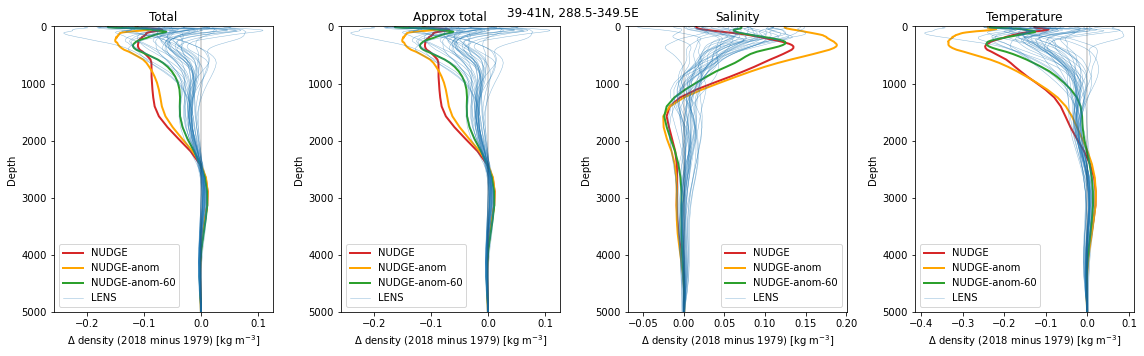

In [51]:
mylabels = ['Total','Approx total','Salinity','Temperature']
fig = plt.figure(figsize=(16,5))
for p, mydata in enumerate([delta.rho, (delta_dens_salt+delta_dens_temp), delta_dens_salt, delta_dens_temp]):
    
    ax = plt.subplot(1,4,1+p)
    for r, run in enumerate(ds.names.values):
        ax.plot(mydata.isel(names=r).squeeze(),ds.z_t,**df[run])

    ax.set_ylim([5000,0])
    ax.set_xlabel('$\Delta$ density (2018 minus 1979) [kg m$^{-3}$]')
    ax.set_ylabel('Depth')
    ax.set_title(mylabels[p])
    ax.axvline(x=0,c='k',linewidth=.3)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
  
plt.tight_layout()
plt.suptitle(str(lat1)+'-'+str(lat2)+'N, '+str(lon1)+'-'+str(lon2)+'E')
fig.savefig('density_with_depth_decomp_natl_diff_40N.png',bbox_inches='tight')
plt.show()
plt.close()

Decomposition works

Water gets lighter - less overturning

At depth - occurs more due to temperature than salinity

NB this is only using a straight up difference rather than a slope - since this is so much faster - will do properly if this analysis is important